<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: the neural netork layer of nodes/neurons where the data enters the neural network
### Hidden Layer: the middle layer(s) where the data is being summed and then processed by a function in each node/neuron of the layer
### Output Layer: the last layer where the data is output to nodes/neurons after being processed, as a prediction
### Neuron: each node of the neural network takes an input, multiplies the input by its weights, sums the product, and then this sum is processed in the activation function which will be passed on to the other neurons in the next layer, which could be another layer in the hidden layer, or the final outer layer
### Weight: represents the strength of a connection between two nodes/neurons. Greater magnitude in weight means a greater influence. A weight decreases the importance of the input value.
### Activation Function: mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron's input is relevant for the model's prediction
### Node Map: a chart demonstrating the connections of the input layer, (hidden layer), and output layer of a neural network
### Perceptron: the simplest and oldest model of a neuron, which takes inputs, sums the inputs, applies an activation function and passes the product to the output layer, while there is no hidden layer


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Information flows into a neural network through the input layer. The input layer is the first layer, there can be multiple "hidden layers" in the middle of the network where the inputs are being processed, and then the last layer is the output layer where predictions are being output. Each layer in the neural nework consists of nodes which are called neurons. The bias neuron is a special neuron added to each layer in the neural network, which simply stores the value of 1 to provide a bias as a parameter to adjust the output along with the weighted sum of the inputs to the neuron. Bias helps fit best for the given data. A weight represents the strength of a connection between two nodes/neurons. Greater magnitude in weight means a greater influence. A weight decreases the importance of the input value. Weight is also the parameter within a neural network that transforms input data within the network's hidden layers. The weights and bias are possibly the most important concept of a neural network. When the inputs are transmitted between neurons, the weights are applied to the inputs and passed into an activation function along with the bias. The neurons have activation functions which are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron's input is relevant for the model's prediction. The output layer produces the results for the given inputs and processes in the previous layers so it consists of the predictions made by all of the previous computations.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
# Establish the training data

import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [10]:
# Use x1 and x2 as inputs, plus a column of 1's for a bias

inputs = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,1]
])

# Use y as correct outputs

correct_outputs = [[1],[1],[1],[0]]

In [11]:
# Sigmoid activation function and its derivative for updating weights

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx*(1-sx)

In [16]:
# Initialize random weights

weights = np.random.random((3,1))
weights

array([[0.8740682 ],
       [0.60275303],
       [0.03431834]])

In [17]:
# Calculate weighted sum of inputs and weights

weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[0.03431834],
       [0.90838654],
       [0.63707137],
       [1.51113957]])

In [18]:
# Output the activated value for the end of 1 training epoch

activated_outputs = sigmoid(weighted_sum)
activated_outputs

array([[0.50857874],
       [0.71266989],
       [0.65409114],
       [0.81923003]])

In [19]:
# Take difference of output and true values to calculate error

error = correct_outputs - activated_outputs
error

array([[ 0.49142126],
       [ 0.28733011],
       [ 0.34590886],
       [-0.81923003]])

In [20]:
# Gradient deccent/backprop

adjustments = error*sigmoid_derivative(weighted_sum)
adjustments

array([[ 0.12281915],
       [ 0.05883702],
       [ 0.07826393],
       [-0.12132157]])

In [21]:
weights = weights + np.dot(inputs.T, adjustments)
weights

array([[0.81158365],
       [0.55969539],
       [0.17291687]])

In [23]:
# Put it all together

# Steps we've already done:
# 1. Randomly Initialized Weights already. Those are in memory as "weights"
# 2. We've already got input data & correct_outputs


# Update our weights 10,000 times - (fingers crossed that this process reduces error)

for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    
    activated_output = sigmoid(weighted_sum)
    
    # Calc error
    
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    
    weights += np.dot(inputs.T, adjustments)
    #weights = weights + weights + np.dot(inputs.T, adjustments) # alternate way of writing weights
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)


Weights after training
[[-8.74361073]
 [-8.74361073]
 [13.20116352]]
Output after training
[[0.99999815]
 [0.98854182]
 [0.98854182]
 [0.01357266]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [24]:
# Import diabetes data

diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [28]:
# Imports for preprocessing

from sklearn.preprocessing import MinMaxScaler, Normalizer

# Instantiate features and target

features = list(diabetes)[:-1]
target = list(diabetes)[-1]

# Create numpy arrays for neural network

X = diabetes[features].to_numpy()
y = diabetes[target].to_numpy()

# Bias - 0 from lecture, could also try 1

diabetes['bias'] = np.zeros(diabetes.shape[0])

# Weights - this will take a little bit longer, but good starting point

y = y * 2 - 1

In [29]:
# Scale the data for the neural network, for comparison

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Normalize the data for the neural network, for comparison

normalize = Normalizer()
X_normalized = normalize.fit_transform(X)

In [32]:
# Perceptron Class

class Perceptron:
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1/(1+np,exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(X)
        return sx*(1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        #weights = ...
        self.weight = np.random.random(1 + X.shape[1]) # could be random.zeros but it goes much slower

        self.errors = [] # Number of misclassifications
        
        for i in range(self.niter):
          err = 0
          for xi, target in zip(X, y):
            predictions = self.predict(xi)
            delta_w = self.rate * (target - predictions) #self.predict(xi) was replaced with predictions
            # Weighted sum of inputs / weights
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            if delta_w != 0.0:
            #err += int(delta_w != 0.0) # replaced this with if statement just above and just below, for better readability
               err = err + 1
          # Calc error
          self.errors.append(err)
        return self
    
    # Update the Weights
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    # Activate!
    
    def predict(self, X):
        """Return class label after unit step"""
        """Defalt Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # if greater than 0, output 1, and if not greater than 0, output -1
    

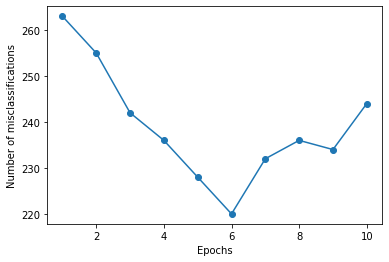

In [36]:
import matplotlib.pyplot as plt

# Perceptron fit to scaled data, which has the lowest number of misclassifications from start to finish.

pn = Perceptron(0.1, 10)
pn.fit(X_scaled, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show;

# As the model learns the proper weight, the number of misclassifications goes down. 

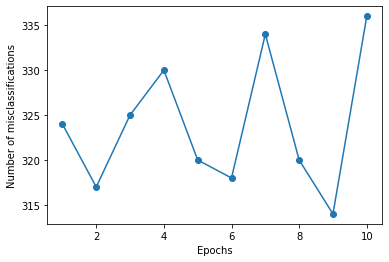

In [39]:
# Perceptron fit to normalized data

pn = Perceptron(0.1, 10)
pn.fit(X_normalized, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show;

# As the model learns the proper weight, the number of misclassifications goes down. 

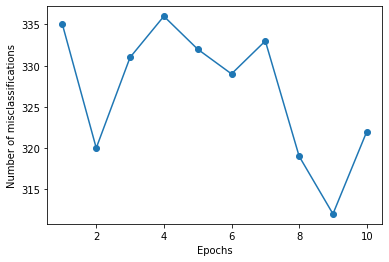

In [37]:
# Perceptron fit to original X data

pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show;

# As the model learns the proper weight, the number of misclassifications goes down. 

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). - 

Backpropagation is basically calculating backwards to improve the model. I watched the 3brown1blue at the beginning of this unit. The past is no predictor of the future, the caveat and disclaimer in predictive modeling. However, once epochs have been completed, like in elementary math, it is possible to go back, check the work, and make improvements if needed. In this case, the computer makes correct calculations, but they can also be improved upon in another experiment. In summary, backpropagation is the backward propagation of errors and the method calculates the gradient of the error function with respect to the neural network's weights.

Thanks to brilliant.org for helping me summarize my paraphrase concisely.
(https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights)

- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?